# CNN Code Propagation

Step #1 : Load in the data

          28x28 Greyscale Image
          Fashion Element Labels

Step #2 : Build the model (Functional API)

          Convolution -> Pooling -> Dense Layers

Step #3 : Train the model

Step #4 : Evaluate the model

Step #5 : Make Predictions

## Loading in the data

In [1]:
import tensorflow as tf
import numpy as np

(X_train,y_train) , (X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train,X_test = X_train/255.0,X_test/255.0

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
 # to use in CNN we need to add at least single level of color channel

 # So we have to reshape it to N*28*28*1

X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

K = len(set(y_train))
print('Number of classes : ',K)

Number of classes :  10


## Build the model

* Functional API

Reasons to use functional API:

1. It looks cleaner
2. Easy to create branches
3. Models with multiple inputs and outputs

In [0]:
#Building model using functional api

from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Model

i = Input(shape=X_train[0].shape)
x = Conv2D(32,(3,3),strides=2,activation='relu')(i)
x = Conv2D(64,(3,3),strides=2,activation='relu')(x)
x = Conv2D(128,(3,3),strides=2,activation='relu')(x)
x = Flatten()(x)
x = Dropout(.2)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(.2)(x)
x = Dense(K,activation='softmax')(x)

model = Model(i,x)

In [0]:
# compile model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
# fit the model

r = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=15)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5171 - accuracy: 0.8083 - val_loss: 0.4011 - val_accuracy: 0.8489
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3622 - accuracy: 0.8627 - val_loss: 0.3770 - val_accuracy: 0.8590
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3129 - accuracy: 0.8811 - val_loss: 0.3300 - val_accuracy: 0.8789
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2785 - accuracy: 0.8932 - val_loss: 0.3150 - val_accuracy: 0.8835
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2524 - accuracy: 0.9043 - val_loss: 0.2953 - val_accuracy: 0.8893
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2344 - accuracy: 0.9110 - val_loss: 0.3049 - val_accuracy: 0.8886
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2152 - accuracy: 0.9184 - val_loss: 0.2860 - val_accuracy:

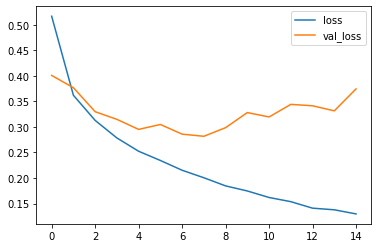

In [8]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

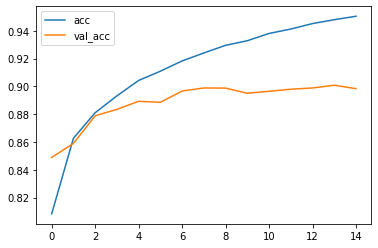

In [9]:
import matplotlib.pyplot as plt

plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()